# Giới Thiệu Bài Toán và Phương Pháp

## Giới Thiệu Bài Toán

Trong cuộc thi này, mục tiêu là xây dựng một mô hình học sâu để giải quyết bài toán phân đoạn ảnh (image segmentation) trong lĩnh vực y tế. Bài toán yêu cầu phân đoạn chính xác các vùng quan tâm trên ảnh y khoa. Phần là tổng quan phương pháp của em, bao gồm các cải tiến và kỹ thuật được áp dụng để tối ưu hóa hiệu suất trên tập dữ liệu.

---

## Phương Pháp Tiếp Cận

Để giải quyết bài toán phân đoạn ảnh y khoa, em đã triển khai một pipeline bao gồm sử dụng kiến trúc mô hình mạnh mẽ, tối ưu hóa siêu tham số, data augmentation, kết hợp nhiều hàm loss, và tăng cường thời gian kiểm tra (Test-Time Augmentation). Dưới đây là các thành phần chính của phương pháp:

### 1. **Model Architecture Mạnh Mẽ Hơn**
- **Kiến trúc**: Sử dụng **DeepLabV3Plus** với encoder **EfficientNet-B5**.
- **Số kênh của Decoder**: Số kênh trong decoder là **256**.
- **Quy mô mô hình**: Mô hình có khoảng **30 triệu tham số**.

### 2. **Tối Ưu Hóa Hyperparameters**
- **Kích thước ảnh**: Sử dụng ảnh đầu vào kích thước **320x320** để giữ lại nhiều thông tin không gian hơn.
- **Batch size**: **6**.
- **Learning rate**: Sử dụng **1e-4** với **CosineAnnealingWarmRestarts scheduler** để điều chỉnh tốc độ học một cách linh hoạt.
- **Epochs và early stopping**: Huấn luyện trong **100 epochs** với cơ chế **early stopping** (patience=15) để tránh overfitting.

### 3. **Data Augmentation Nâng Cao**
- **Kỹ thuật tăng cường**:
  - Áp dụng **ElasticTransform** và **GridDistortion** để mô phỏng các biến dạng phổ biến trong ảnh y khoa.
  - Sử dụng **CLAHE**, **MotionBlur**, và **HueSaturationValue** để tăng tính đa dạng của dữ liệu.
- **Chuẩn hóa**: Chuẩn hóa ảnh với thống kê của **ImageNet** để đảm bảo tính nhất quán.
- **Chiến lược**: Áp dụng data augmentation phức tạp cho tập huấn luyện, nhưng giữ data augmentation đơn giản cho tập kiểm tra để đảm bảo tính ổn định.

### 4. **Loss Function Kết Hợp**
- **Hàm mất mát**: Kết hợp **Dice Loss**, **Focal Loss**, và **Tversky Loss** để xử lý hiệu quả vấn đề mất cân bằng lớp và các trường hợp khó (hard examples).
- **Trọng số**:
  - Dice Loss: **40%**
  - Focal Loss: **30%**
  - Tversky Loss: **30%**

### 5. **Training Techniques Hiện Đại**
- **Mixed Precision Training (AMP)**: Giảm sử dụng bộ nhớ và tăng tốc độ huấn luyện.
- **Optimizer**: Sử dụng **AdamW** với **weight decay** để cải thiện khả năng tổng quát hóa.
- **Scheduler**: Áp dụng **CosineAnnealingWarmRestarts** để tối ưu hóa quá trình học.
- **Early stopping**: Theo dõi hiệu suất với **patience monitoring** để dừng huấn luyện khi mô hình không cải thiện.

### 6. **Test-Time Augmentation (TTA)**
- **Kỹ thuật TTA**: Sử dụng **4 augmentations** bao gồm: Original, Horizontal Flip, Vertical Flip, và Rotate 90°.
- **Kết hợp dự đoán**: Lấy trung bình các dự đoán để tăng độ chính xác và robust.
- **Hậu xử lý**: Áp dụng các **morphological operations** để tinh chỉnh kết quả phân đoạn.

### Import libraries

In [1]:
!pip install segmentation-models-pytorch albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-1

In [2]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
import segmentation_models_pytorch as smp
import segmentation_models_pytorch.utils as smp_utils
from torch.cuda.amp import autocast, GradScaler
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
# Đường dẫn dữ liệu
IMAGE_DIR = '/kaggle/input/2425-ii-ait-3002-medical-image-segmentation/Dataset/Train/Image'
MASK_DIR = '/kaggle/input/2425-ii-ait-3002-medical-image-segmentation/Dataset/Train/Mask'
TEST_IMAGE_DIR = '/kaggle/input/2425-ii-ait-3002-medical-image-segmentation/Dataset/Test/Image'

In [4]:
# Cấu hình training
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
IMG_SIZE = 320  
BATCH_SIZE = 6  
LEARNING_RATE = 1e-4  
NUM_EPOCHS = 100 
VAL_SPLIT = 0.2
PATIENCE = 15  
NUM_WORKERS = 2

In [5]:
# Đường dẫn lưu model
MODEL_SAVE_PATH = "best_model_dice.pth"
OUTPUT_CSV_FILE = 'submission.csv'

### Dataset class

In [6]:
class SkinDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        
        # Tìm mask tương ứng
        mask_name_parts = os.path.splitext(img_name)
        possible_mask_names = [mask_name_parts[0] + '.png', mask_name_parts[0] + '.jpg', img_name]
        mask_path = None
        for mn in possible_mask_names:
            potential_path = os.path.join(self.mask_dir, mn)
            if os.path.exists(potential_path):
                mask_path = potential_path
                break
        
        if mask_path is None:
            raise FileNotFoundError(f"Mask not found for image {img_name}")

        # Đọc ảnh và mask
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = np.expand_dims(mask, axis=-1)
        mask = (mask > 127).astype(np.float32)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
            
            # Đảm bảo mask có đúng shape
            if mask.ndim == 3 and mask.shape[-1] == 1:
                mask = mask.permute(2, 0, 1)
            elif mask.ndim == 2:
                mask = mask.unsqueeze(0)
        
        return image, mask

### Data Augmentation

**Data augmentation là quá trình tạo ra các biến thể mới của dữ liệu hiện có bằng cách áp dụng các phép biến đổi như xoay, lật, thay đổi độ sáng, hoặc thêm nhiễu. Mục tiêu là giúp mô hình học được các đặc trưng tổng quát hơn, từ đó cải thiện khả năng tổng quát hóa và hiệu suất trên các điều kiện thực tế đa dạng (như ánh sáng, góc nhìn khác nhau). Bằng cách bổ sung dữ liệu tăng cường, mô hình trở nên robust hơn, đặc biệt khi dữ liệu gốc hạn chế hoặc không đại diện đầy đủ cho các kịch bản ứng dụng thực tiễn. Các kỹ thuật data augmentation được sử dụng bao gồm:**

- **HorizontalFlip**: Lật ngang (p=0.5) để học đặc trưng bất biến hướng ngang.
- **VerticalFlip**: Lật dọc (p=0.5) để tăng tính đa dạng góc nhìn.
- **Rotate**: Xoay ±20° (p=0.5) để nhận diện đặc trưng bất biến xoay.
- **RandomBrightnessContrast**: Điều chỉnh sáng/tương phản (±0.2, p=0.5) để xử lý biến thiên ánh sáng.
- **ColorJitter**: Thay đổi sáng/tương phản/sắc độ (p=0.3) để mô phỏng biến thể màu.
- **GaussianBlur**: Làm mờ Gaussian (kernel 3-5, p=0.2) để xử lý ảnh chất lượng thấp.
- **MotionBlur, MedianBlur, Blur**: Chọn một phép làm mờ (p=0.2) để mô phỏng nhiễu/độ mờ.
- **ElasticTransform**: Biến dạng đàn hồi (p=0.2) để tái hiện biến dạng mô y khoa.
- **GridDistortion**: Biến dạng lưới (p=0.2) để học đặc trưng trên cấu trúc phức tạp.
- **CLAHE, Sharpen, Emboss**: Chọn tăng cường tương phản/cạnh (p=0.3) để làm nổi bật chi tiết.
- **HueSaturationValue**: Thay đổi sắc độ/bão hòa (p=0.3) để mô phỏng biến thể màu sắc.

In [7]:
# Augmentation phức tạp cho tranining
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=20, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05, p=0.3),
    A.GaussianBlur(blur_limit=(3, 5), p=0.2),
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.2),
    A.GridDistortion(p=0.2),
    A.OneOf([
        A.MotionBlur(p=0.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.Blur(blur_limit=3, p=0.1),
    ], p=0.2),
    A.OneOf([
        A.CLAHE(clip_limit=2),
        A.Sharpen(),
        A.Emboss(),
        A.RandomBrightnessContrast(),            
    ], p=0.3),
    A.HueSaturationValue(p=0.3),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

**chỉ áp dụng data augmentation tối thiểu cho tập validation giữ nguyên đặc tính gốc của dữ liệu, đảm bảo đánh giá hiệu suất mô hình trên dữ liệu gần với thực tế, tránh sai lệch do biến đổi ngẫu nhiên.**

In [8]:
# Augmentation đơn giản cho validation
val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

### Mô Hình DeepLabV3Plus

#### DeepLabV3Plus
DeepLabV3Plus là một kiến trúc mô hình Semantic Segmentation tiên tiến, phát triển bởi Google, được thiết kế để đạt hiệu suất cao trong các bài toán Image Segmentation, đặc biệt là trong lĩnh vực y khoa. Mô hình kết hợp hai thành phần chính: **encoder** trích xuất đặc trưng đa tỷ lệ bằng **Atrous Spatial Pyramid Pooling (ASPP)** và **decoder** tái tạo bản đồ phân đoạn chi tiết thông qua **skip connections** để kết hợp đặc trưng cấp cao và cấp thấp. DeepLabV3Plus cải thiện độ chính xác ranh giới và hiệu quả tính toán, phù hợp với các tác vụ yêu cầu nhận diện chi tiết phức tạp, như Segment tổn thương da hoặc mô bệnh lý. Kiến trúc này tận dụng backbone EfficientNet để trích xuất đặc trưng hiệu quả, hỗ trợ transfer learning và tối ưu hóa trên dữ liệu hạn chế.

#### Model

- **Encoder (EfficientNet-B5)**: Sử dụng EfficientNet-B5 làm backbone để trích xuất đặc trưng. Đây là một CNN hiệu quả với **compound scaling**, cân bằng độ sâu, chiều rộng, và độ phân giải, giúp học các đặc trưng trừu tượng từ chi tiết cục bộ đến ngữ cảnh toàn cục, phù hợp với ảnh y khoa phức tạp.
- **Encoder Weights (ImageNet)**: Khởi tạo với trọng số từ ImageNet, tận dụng transfer learning để học nhanh hơn và cải thiện hiệu suất trên tập dữ liệu y khoa nhỏ bằng cách sử dụng các đặc trưng tổng quát đã học trước.
- **In Channels (3)**: Định nghĩa đầu vào là ảnh RGB với 3 kênh (đỏ, xanh, lam), phù hợp với dữ liệu ảnh màu tiêu chuẩn trong các ứng dụng y tế.
- **Classes (1)**: Mô hình xuất ra một kênh duy nhất cho phân đoạn nhị phân, dự đoán xác suất mỗi pixel thuộc vùng quan tâm (như tổn thương) hoặc nền.
- **Activation (Sigmoid)**: Hàm kích hoạt sigmoid ở lớp cuối chuyển đổi logits thành xác suất [0, 1], phù hợp với Binary Segmentation và hàm loss Dice.
- **Encoder Depth (5)**: Xác định số tầng của encoder (5 stages trong EfficientNet-B5), cho phép trích xuất đặc trưng ở nhiều mức độ trừu tượng, từ chi tiết thấp đến ngữ cảnh cao.
- **Decoder Channels (256)**: Số kênh trong decoder là 256, tăng khả năng biểu diễn để tái tạo ranh giới chính xác, đặc biệt quan trọng với các vùng quan tâm nhỏ trong ảnh y khoa.

In [9]:
MODEL_ACTIVATION_TYPE = 'sigmoid'

def create_model():
    model = smp.DeepLabV3Plus(
        encoder_name="efficientnet-b5", 
        encoder_weights="imagenet",
        in_channels=3,
        classes=1,
        activation=MODEL_ACTIVATION_TYPE,
        encoder_depth=5,
        decoder_channels=256
    )
    return model

model = create_model().to(DEVICE)

config.json:   0%|          | 0.00/106 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/122M [00:00<?, ?B/s]

### Loss function & Metrics 

**Việc kết hợp nhiều hàm mất mát và sử dụng các chỉ số như Dice Score và IoU giúp cải thiện khả năng nhận RoI nhỏ và phức tạp.**

**Loss function**
1. *Dice Loss*: Đo lường mức độ không chồng lấn giữa dự đoán và nhãn thực tế dựa trên hệ số Dice, tập trung vào sự tương đồng giữa các vùng phân đoạn. 
2. *Focal Loss*: điều chỉnh trọng số để tập trung vào các mẫu khó (hard examples) bằng cách giảm ảnh hưởng của các mẫu dễ phân loại. Tham số alpha=0.25 kiểm soát mất cân bằng lớp, còn gamma=2.0 tăng trọng số cho các mẫu bị phân loại sai. Giúp cải thiện khả năng nhận diện các pixel khó, như ranh giới RoI 
3. *Tversky Loss*: điều chỉnh trọng số giữa lỗi dương giả (false positives) và âm giả (false negatives) thông qua tham số alpha và beta. Giá trị beta cao hơn ưu tiên giảm lỗi âm giả, phù hợp với bài toán y khoa nơi bỏ sót vùng quan tâm (false negatives) là nghiêm trọng.
- Kết hợp nhiều hàm mất mát như Dice Loss, Focal Loss, và Tversky Loss được sử dụng để giải quyết các thách thức như tập trung vào các vùng khó. Sự kết hợp này giúp mô hình học được các đặc trưng chính xác hơn, đặc biệt trong các bài toán phân đoạn ảnh y khoa, nơi ranh giới vùng quan tâm cần được xác định chính xác.
- Kết hợp 40% Dice Loss, 30% Focal Loss, và 30% Tversky Loss để tận dụng ưu điểm của từng hàm. Dice Loss tối ưu hóa độ chồng lấn, Focal Loss tập trung vào mẫu khó, và Tversky Loss ưu tiên giảm lỗi âm giả.


**Metrics** 
- Các chỉ số như Dice Score (F-score) và IoU (Intersection over Union) được sử dụng để đánh giá hiệu suất mô hình. Chúng tập trung vào việc đo lường mức độ chồng lấn giữa vùng dự đoán và vùng thực tế, cung cấp thông tin về độ chính xác của phân đoạn.
- *Dice Score*: đo lường mức độ chồng lấn giữa dự đoán và nhãn thực tế, với ngưỡng (threshold=0.5) để chuyển đổi xác suất thành nhãn nhị phân.
- *IoU*: tỷ lệ giữa phần giao (intersection) và phần hợp (union) của vùng dự đoán và nhãn thực tế, với ngưỡng 0.5 để nhị phân hóa. IoU là một chỉ số chuẩn trong phân đoạn, bổ sung cho Dice Score.





In [10]:
# Kết hợp nhiều loss functions
dice_loss_fn = smp.losses.DiceLoss(mode='binary')
focal_loss_fn = smp.losses.FocalLoss(mode='binary', alpha=0.25, gamma=2.0)
tversky_loss_fn = smp.losses.TverskyLoss(mode='binary', alpha=0.3, beta=0.7)

# Metrics
dice_score_metric = smp_utils.metrics.Fscore(threshold=0.5)
iou_score_metric = smp_utils.metrics.IoU(threshold=0.5)

def combined_loss(pred_probs, target):
    """Kết hợp nhiều loss functions để tối ưu hóa"""
    loss_dice = dice_loss_fn(pred_probs, target)
    loss_focal = focal_loss_fn(pred_probs, target)
    loss_tversky = tversky_loss_fn(pred_probs, target)
    
    # Weighted combination
    total_loss = 0.4 * loss_dice + 0.3 * loss_focal + 0.3 * loss_tversky
    return total_loss

### Optimizer & Scheduler 

- **Optimizer: AdamW**: Một biến thể của Adam với weight decay (1e-5), điều chỉnh trọng số dựa trên gradient và moment.
- **Scheduler: CosineAnnealingWarmRestarts**: Điều chỉnh tốc độ học theo chu kỳ cosine.

In [11]:
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
scaler = GradScaler()

### Hàm training & validation 

In [12]:
def train_fn(loader, model, optimizer, loss_fn, dice_metric, iou_metric, device, scaler):
    model.train()
    epoch_loss = 0
    epoch_dice_score = 0
    epoch_iou_score = 0
    
    pbar = tqdm(loader, desc="Training")
    for batch_idx, (data, targets) in enumerate(pbar):
        data = data.to(device=device, dtype=torch.float32)
        targets = targets.to(device=device, dtype=torch.float32)
        
        optimizer.zero_grad()
        
        with autocast():  
            predictions = model(data)
            loss = loss_fn(predictions, targets)
            pred_probs = predictions if MODEL_ACTIVATION_TYPE == 'sigmoid' else torch.sigmoid(predictions)
            dice_score = dice_metric(pred_probs, targets)
            iou_score = iou_metric(pred_probs, targets)
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        epoch_loss += loss.item()
        epoch_dice_score += dice_score.item()
        epoch_iou_score += iou_score.item()
        
        pbar.set_postfix({
            'Loss': f'{loss.item():.4f}',
            'Dice': f'{dice_score.item():.4f}',
            'IoU': f'{iou_score.item():.4f}'
        })
    
    avg_epoch_loss = epoch_loss / len(loader)
    avg_epoch_dice_score = epoch_dice_score / len(loader)
    avg_epoch_iou_score = epoch_iou_score / len(loader)
    
    return avg_epoch_loss, avg_epoch_dice_score, avg_epoch_iou_score

In [13]:
def evaluate_fn(loader, model, loss_fn, dice_metric, iou_metric, device):
    model.eval()
    epoch_loss = 0
    epoch_dice_score = 0
    epoch_iou_score = 0
    
    with torch.no_grad():
        pbar = tqdm(loader, desc="Validation")
        for batch_idx, (data, targets) in enumerate(pbar):
            data = data.to(device=device, dtype=torch.float32)
            targets = targets.to(device=device, dtype=torch.float32)
            
            with autocast():
                predictions = model(data)
                loss = loss_fn(predictions, targets)
                pred_probs = predictions if MODEL_ACTIVATION_TYPE == 'sigmoid' else torch.sigmoid(predictions)
                dice_score = dice_metric(pred_probs, targets)
                iou_score = iou_metric(pred_probs, targets)
            
            epoch_loss += loss.item()
            epoch_dice_score += dice_score.item()
            epoch_iou_score += iou_score.item()
            
            pbar.set_postfix({
                'Loss': f'{loss.item():.4f}',
                'Dice': f'{dice_score.item():.4f}',
                'IoU': f'{iou_score.item():.4f}'
            })
    
    avg_epoch_loss = epoch_loss / len(loader)
    avg_epoch_dice_score = epoch_dice_score / len(loader)
    avg_epoch_iou_score = epoch_iou_score / len(loader)
    
    return avg_epoch_loss, avg_epoch_dice_score, avg_epoch_iou_score

### Chuẩn bị dữ liệu cho training và validation 

In [14]:
# Subset với transform riêng biệt
class SubsetWithTransform(Dataset):
    def __init__(self, main_dataset, indices, transform=None):
        self.main_dataset = main_dataset
        self.indices = indices
        self.transform = transform

    def __getitem__(self, idx):
        original_idx = self.indices[idx]
        image, mask = self.main_dataset[original_idx]
        
        # Convert tensor về numpy để apply transform
        if isinstance(image, torch.Tensor):
            image = image.permute(1, 2, 0).numpy()
        if isinstance(mask, torch.Tensor):
            mask = mask.squeeze().numpy()
            if mask.ndim == 2:
                mask = np.expand_dims(mask, axis=-1)
        
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
            
            if mask.ndim == 3 and mask.shape[-1] == 1:
                mask = mask.permute(2, 0, 1)
            elif mask.ndim == 2:
                mask = mask.unsqueeze(0)
        
        return image, mask

    def __len__(self):
        return len(self.indices)

In [15]:
base_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    ToTensorV2(),
])

In [16]:
full_dataset_obj = SkinDataset(IMAGE_DIR, MASK_DIR, transform=base_transform)

In [17]:
# Chia dataset
dataset_size = len(full_dataset_obj)
val_size = int(VAL_SPLIT * dataset_size)
train_size = dataset_size - val_size

torch.manual_seed(42)
train_indices, val_indices = random_split(range(dataset_size), [train_size, val_size])

In [18]:
# Tạo dataset với transform riêng
train_dataset = SubsetWithTransform(full_dataset_obj, train_indices.indices, transform=train_transform)
val_dataset = SubsetWithTransform(full_dataset_obj, val_indices.indices, transform=val_transform)

In [19]:
# DataLoaders
train_loader = DataLoader(
    train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    num_workers=NUM_WORKERS,
    pin_memory=True
)
val_loader = DataLoader(
    val_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=False, 
    num_workers=NUM_WORKERS,
    pin_memory=True
)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")

Training samples: 870
Validation samples: 217


### Training loop 

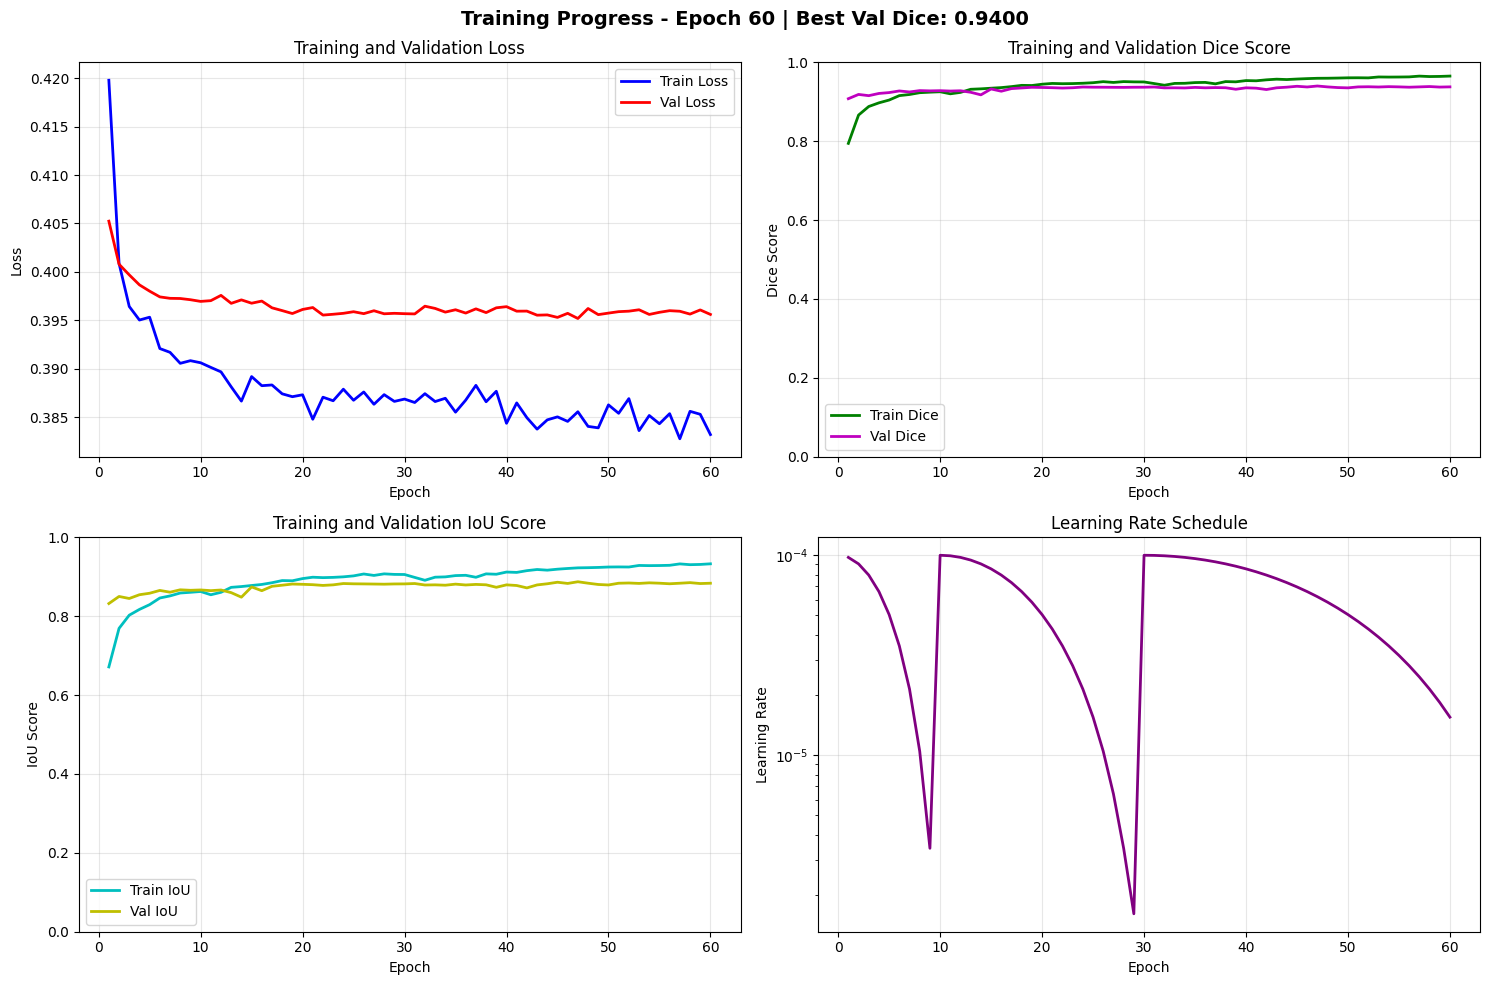


Epoch 61/100
--------------------------------------------------


Validation: 100%|██████████| 37/37 [00:05<00:00,  6.36it/s, Loss=0.4817, Dice=0.9664, IoU=0.9350]


Train - Loss: 0.3825, Dice: 0.9657, IoU: 0.9339
Val   - Loss: 0.3960, Dice: 0.9371, IoU: 0.8825
Learning Rate: 1.29e-05
No improvement. Patience: 14/15

Epoch 62/100
--------------------------------------------------


Validation: 100%|██████████| 37/37 [00:05<00:00,  6.89it/s, Loss=0.4823, Dice=0.9574, IoU=0.9182]

Train - Loss: 0.3830, Dice: 0.9655, IoU: 0.9335
Val   - Loss: 0.3958, Dice: 0.9371, IoU: 0.8825
Learning Rate: 1.05e-05
No improvement. Patience: 15/15
Early stopping triggered!

Training completed!
Best validation Dice score: 0.9400


In [20]:
# ================ TRAINING LOOP ================
print(f"Starting training on {DEVICE}")
best_val_dice = 0.0
patience_counter = 0

# Lưu trữ metrics
train_losses, val_losses = [], []
train_dices, val_dices = [], []
train_ious, val_ious = [], []
epochs_list = []
learning_rates = []

plt.style.use('default')

for epoch in range(NUM_EPOCHS):
    print(f"\nEpoch {epoch+1}/{NUM_EPOCHS}")
    print("-" * 50)
    
    # Training
    train_loss, train_dice, train_iou = train_fn(
        train_loader, model, optimizer, combined_loss, 
        dice_score_metric, iou_score_metric, DEVICE, scaler
    )
    
    # Validation
    val_loss, val_dice, val_iou = evaluate_fn(
        val_loader, model, combined_loss, 
        dice_score_metric, iou_score_metric, DEVICE
    )
    
    # Update scheduler
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    
    # Log metrics
    epochs_list.append(epoch + 1)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_dices.append(train_dice)
    val_dices.append(val_dice)
    train_ious.append(train_iou)
    val_ious.append(val_iou)
    learning_rates.append(current_lr)
    
    print(f"Train - Loss: {train_loss:.4f}, Dice: {train_dice:.4f}, IoU: {train_iou:.4f}")
    print(f"Val   - Loss: {val_loss:.4f}, Dice: {val_dice:.4f}, IoU: {val_iou:.4f}")
    print(f"Learning Rate: {current_lr:.2e}")
    
    # Save best model
    if val_dice > best_val_dice:
        print(f"Validation Dice improved: {best_val_dice:.4f} -> {val_dice:.4f}")
        best_val_dice = val_dice
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'best_val_dice': best_val_dice,
        }, MODEL_SAVE_PATH)
        patience_counter = 0
    else:
        patience_counter += 1
        print(f"No improvement. Patience: {patience_counter}/{PATIENCE}")
    
    # Early stopping
    if patience_counter >= PATIENCE:
        print("Early stopping triggered!")
        break
    
    # Plot progress
    if (epoch + 1) % 5 == 0 or epoch == 0:
        clear_output(wait=True)
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # Loss plot
        ax1.plot(epochs_list, train_losses, 'b-', label='Train Loss', linewidth=2)
        ax1.plot(epochs_list, val_losses, 'r-', label='Val Loss', linewidth=2)
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_title('Training and Validation Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Dice plot
        ax2.plot(epochs_list, train_dices, 'g-', label='Train Dice', linewidth=2)
        ax2.plot(epochs_list, val_dices, 'm-', label='Val Dice', linewidth=2)
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Dice Score')
        ax2.set_title('Training and Validation Dice Score')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.set_ylim(0, 1)
        
        # IoU plot
        ax3.plot(epochs_list, train_ious, 'c-', label='Train IoU', linewidth=2)
        ax3.plot(epochs_list, val_ious, 'y-', label='Val IoU', linewidth=2)
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('IoU Score')
        ax3.set_title('Training and Validation IoU Score')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_ylim(0, 1)
        
        # Learning Rate plot
        ax4.plot(epochs_list, learning_rates, 'purple', linewidth=2)
        ax4.set_xlabel('Epoch')
        ax4.set_ylabel('Learning Rate')
        ax4.set_title('Learning Rate Schedule')
        ax4.grid(True, alpha=0.3)
        ax4.set_yscale('log')
        
        plt.suptitle(f'Training Progress - Epoch {epoch+1} | Best Val Dice: {best_val_dice:.4f}', 
                     fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

print(f"\nTraining completed!")
print(f"Best validation Dice score: {best_val_dice:.4f}")

### Inference

In [21]:
def mask_to_rle(mask):
    """Convert mask to RLE encoding"""
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [22]:
# Load best model
checkpoint = torch.load(MODEL_SAVE_PATH)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

DeepLabV3Plus(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_expand_conv): Identity()
        (_bn0): Identity()
        (_depthwise_conv): Conv2dStaticSamePadding(
          48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          48, 12, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          12, 48, kernel_size=(1, 1), stride=(1, 1)
          (static_paddin

In [23]:
# TTA transforms
tta_transforms = [
    A.Compose([A.Resize(IMG_SIZE, IMG_SIZE), A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), ToTensorV2()]),
    A.Compose([A.HorizontalFlip(p=1.0), A.Resize(IMG_SIZE, IMG_SIZE), A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), ToTensorV2()]),
    A.Compose([A.VerticalFlip(p=1.0), A.Resize(IMG_SIZE, IMG_SIZE), A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), ToTensorV2()]),
    A.Compose([A.Rotate(limit=90, p=1.0), A.Resize(IMG_SIZE, IMG_SIZE), A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), ToTensorV2()]),
]

In [24]:
submission_data = []
test_images = sorted([f for f in os.listdir(TEST_IMAGE_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))])

print(f"Processing {len(test_images)} test images with TTA...")

for img_filename in tqdm(test_images, desc="Generating predictions"):
    image_id = os.path.splitext(img_filename)[0]
    img_path = os.path.join(TEST_IMAGE_DIR, img_filename)
    
    original_image_bgr = cv2.imread(img_path)
    if original_image_bgr is None:
        print(f"Warning: Could not read {img_path}")
        submission_data.append({'ID': image_id, 'Mask': ''})
        continue
    
    original_height, original_width = original_image_bgr.shape[:2]
    original_image_rgb = cv2.cvtColor(original_image_bgr, cv2.COLOR_BGR2RGB)
    
    # TTA predictions
    pred_probs_sum = np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.float32)
    
    for i, tta_transform in enumerate(tta_transforms):
        augmented = tta_transform(image=original_image_rgb)
        input_tensor = augmented['image'].unsqueeze(0).to(DEVICE, dtype=torch.float32)
        
        with torch.no_grad():
            with autocast():
                pred_output = model(input_tensor)
                pred_probs = pred_output if MODEL_ACTIVATION_TYPE == 'sigmoid' else torch.sigmoid(pred_output)
                pred_probs_np = pred_probs.squeeze().cpu().numpy()
                
                # Reverse augmentations
                if i == 1:  # Đảo chiều ngang 
                    pred_probs_np = np.fliplr(pred_probs_np)
                elif i == 2:  # Đảo chiều dọc 
                    pred_probs_np = np.flipud(pred_probs_np)
                elif i == 3:  # Xoay 90
                    pred_probs_np = np.rot90(pred_probs_np, k=-1)
                
                pred_probs_sum += pred_probs_np
    
    # Average TTA predictions
    pred_probs_avg = pred_probs_sum / len(tta_transforms)
    
    # Post-processing
    from scipy import ndimage
    mask_binary = (pred_probs_avg > 0.5).astype(np.uint8)
    
    mask_binary = ndimage.binary_fill_holes(mask_binary).astype(np.uint8)
    
    # Resize 
    mask_resized = cv2.resize(mask_binary, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
    
    # Generate RLE
    if np.sum(mask_resized) == 0:
        rle_string = ""
    else:
        rle_string = mask_to_rle(mask_resized)
    
    submission_data.append({'ID': image_id, 'Mask': rle_string})

Processing 192 test images with TTA...


Generating predictions: 100%|██████████| 192/192 [00:39<00:00,  4.88it/s]


In [25]:
# Submission 
submission_df = pd.DataFrame(submission_data)
submission_df.to_csv(OUTPUT_CSV_FILE, index=False)
print(f"\nSubmission saved to {OUTPUT_CSV_FILE}")
print(f"Total test images processed: {len(submission_data)}")
print(f"Images with predictions: {sum(1 for item in submission_data if item['Mask'] != '')}")


Submission saved to submission.csv
Total test images processed: 192
Images with predictions: 192
